## Import Libraries

In [246]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

## Load the Data

In [121]:
df = pd.read_csv("final_data.csv")

In [122]:
df.shape

(10754, 22)

In [123]:
df.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


In [124]:
df.columns


Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

Data Profiling

In [128]:
df.shape

(10754, 22)

In [129]:
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [130]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [131]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [132]:
df

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [133]:
# Completeness
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [134]:
# Accurecy types
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [135]:
df.nunique()

player                 10754
team                     374
name                   10584
position                  16
height                    47
age                       30
appearance               108
goals                   5329
assists                 5065
yellow cards            6291
second yellow cards     1095
red cards               1219
goals conceded           742
clean sheets             635
minutes played          5036
days_injured             772
games_injured            154
award                     46
current_value            128
highest_value            156
position_encoded           4
winger                     2
dtype: int64

In [136]:
# Dropping irrelevant columns
df = df.drop(columns=['player' , 'name'])

# Display the first few rows to confirm the columns are removed
df.head()


,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,Manchester United,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,Manchester United,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [137]:
# Drop goalkeepers based on the 'position' column
df = df[df['position'] != 'Goalkeeper']
df.shape

(9525, 20)

In [138]:
# Dropping irrelevant columns
df = df.drop(columns=['clean sheets' , 'goals conceded'])

# Display the first few rows to confirm the columns are removed
df.head()

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3,Manchester United,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0000,0.0,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0000,0.0,5031,238,51,21,40000000,80000000,2,0
5,Manchester United,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,0.0189,0.0,4762,148,27,1,25000000,70000000,2,0
6,Manchester United,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,0.0000,0.0,5471,95,19,10,15000000,35000000,2,0
7,Manchester United,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,0.0000,0.0,416,932,169,7,2000000,20000000,2,0


In [139]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
categorical_features = ['team', 'position']
numeric_features = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'goals conceded'
                   , 'clean sheets', 'minutes played', 'days_injured', 'games_injured', 'award', 'current_value', 'highest_value', 'position_encoded', 'winger']

In [140]:
for i in categorical_features:
   print (df[i].value_counts())

team
Jeonbuk Hyundai Motors    41
FC Seoul                  41
Daejeon Hana Citizen      41
Gangwon FC                39
Daegu FC                  37
                          ..
Swansea City              19
Ümraniyespor              19
FC Barcelona              19
Hatayspor                 10
Gaziantep FK               5
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1821
Attack Centre-Forward         1353
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64


In [141]:
df['team'].unique

<bound method Series.unique of 3               Manchester United
4               Manchester United
5               Manchester United
6               Manchester United
7               Manchester United
                   ...           
10749    Western Sydney Wanderers
10750    Western Sydney Wanderers
10751    Western Sydney Wanderers
10752    Western Sydney Wanderers
10753    Western Sydney Wanderers
Name: team, Length: 9525, dtype: object>

In [142]:
# Calculate the frequency of each 'Type'
type_counts = df['team'].value_counts()

# Filter 'Type' values that appear 10 or more times
df = df[df['team'].isin(type_counts[type_counts >= 10].index)]


In [143]:
df.shape

(9520, 18)

In [144]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,9520.000000,9520.000000,9520.000000,9520.000000,9520.000000,9520.000000,9520.000000,9520.000000,9520.000000,9520.000000,9520.000000,9520.000000,9.520000e+03,9.520000e+03,9520.000000,9520.000000
mean,180.261607,25.860351,37.977311,0.141652,0.098236,0.207623,0.005144,0.006998,2510.115336,121.493908,16.384769,1.973424,3.879340e+06,6.526570e+06,2.934139,0.347269
std,6.600249,4.626170,26.344751,0.245738,0.148686,0.455249,0.026434,0.084505,1990.122394,177.533558,23.804346,3.802845,9.479314e+06,1.386327e+07,0.819175,0.476127
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,2.000000,0.000000
25%,175.000000,22.000000,13.000000,0.000000,0.000000,0.082082,0.000000,0.000000,728.000000,0.000000,0.000000,0.000000,3.000000e+05,5.000000e+05,2.000000,0.000000
50%,180.000000,26.000000,38.000000,0.064974,0.058923,0.167813,0.000000,0.000000,2193.000000,41.000000,6.000000,1.000000,9.000000e+05,1.500000e+06,3.000000,0.000000
75%,185.000000,29.000000,60.000000,0.201447,0.146341,0.261381,0.000000,0.000000,4006.000000,186.000000,25.000000,2.000000,3.000000e+06,6.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9033.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [145]:
df['team'].value_counts()

team
Jeonbuk Hyundai Motors    41
FC Seoul                  41
Daejeon Hana Citizen      41
Gangwon FC                39
Daegu FC                  37
                          ..
FC Barcelona              19
Aston Villa               19
Olympique Marseille       19
Ümraniyespor              19
Hatayspor                 10
Name: count, Length: 373, dtype: int64

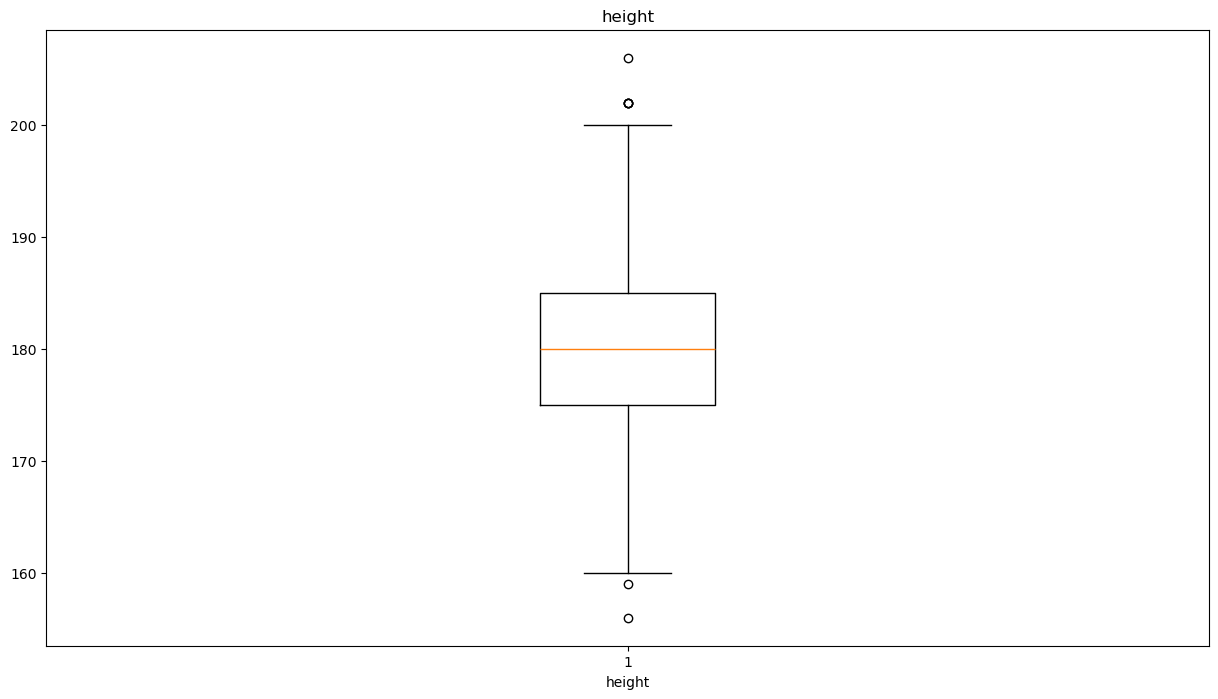

In [146]:
plt.figure(figsize=(15,8))
plt.boxplot(df['height'])
plt.xlabel('height')
plt.title('height')
plt.show()

In [147]:
# remove the outlier for height

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
speed_Q1 = df['height'].quantile(0.25)
speed_Q3 = df['height'].quantile(0.75)

# Calculate the IQR by subtracting Q1 from Q3
speed_IQR = speed_Q3 - speed_Q1

# Define the lower and upper bounds for the outliers
speed_lower_bound = speed_Q1 - 1.5 * speed_IQR
speed_upper_bound = speed_Q3 + 1.5 * speed_IQR

# # Filter out outliers
df[(df['height'] < speed_lower_bound) | (df['height'] > speed_upper_bound)]

# Keep only rows that are not outliers
df = df[(df['height'] >= speed_lower_bound) & (df['height'] <= speed_upper_bound)]

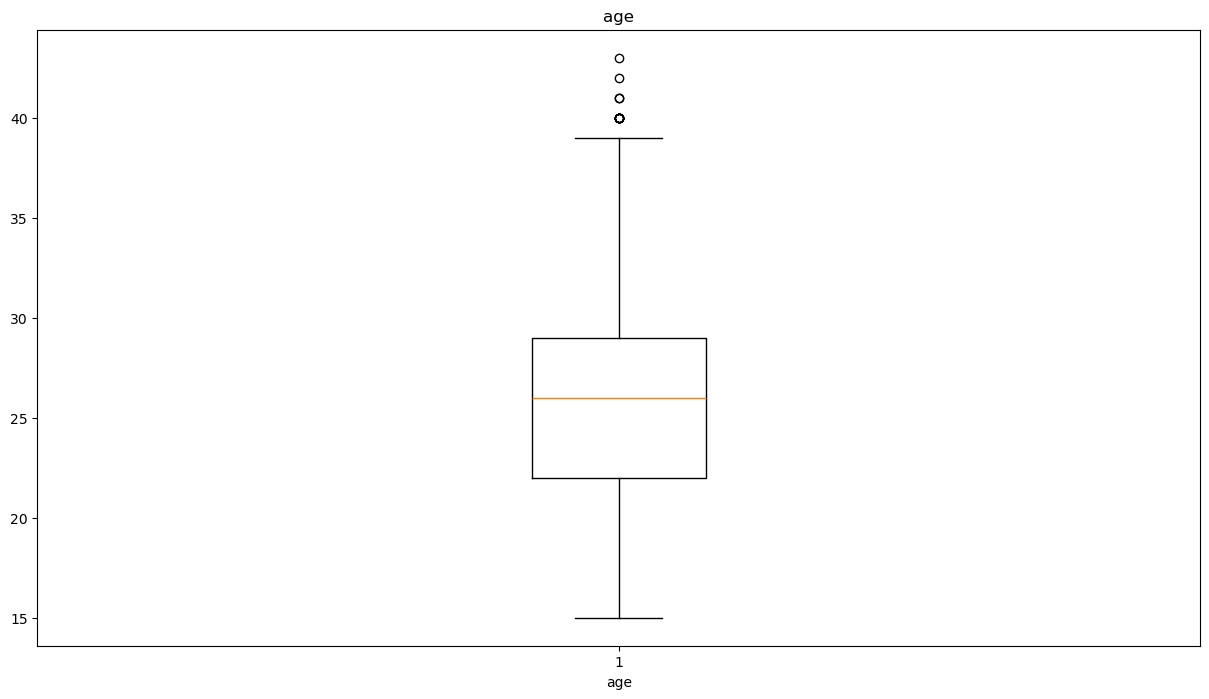

In [148]:
# Remove the outlier from Age 
plt.figure(figsize=(15,8))
plt.boxplot(df['age'])
plt.xlabel('age')
plt.title('age')
plt.show()

In [149]:
# remove the outlier for age

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

# Calculate the IQR by subtracting Q1 from Q3
IQR = Q3 - Q1

# Define the lower and upper bounds for the outliers
speed_lower_bound = Q1 - 1.5 * IQR
speed_upper_bound = Q3 + 1.5 * IQR

# # Filter out outliers
df[(df['age'] < speed_lower_bound) | (df['age'] > speed_upper_bound)]

# Keep only rows that are not outliers
df = df[(df['age'] >= speed_lower_bound) & (df['age'] <= speed_upper_bound)]

In [150]:
# List of columns to check for outliers
columns_to_check = ['goals', 'assists', 'yellow cards', 'red cards', 'minutes played', 'days_injured', 
                    'games_injured', 'current_value', 'highest_value']

# Start with the full DataFrame
df_filtered = df.copy()

# Loop through each column and filter out rows with outliers
for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
 # Keep only rows within the bounds for this column
df = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]

In [151]:
df.shape

(8296, 18)

In [152]:
df['age'].max()

39.0

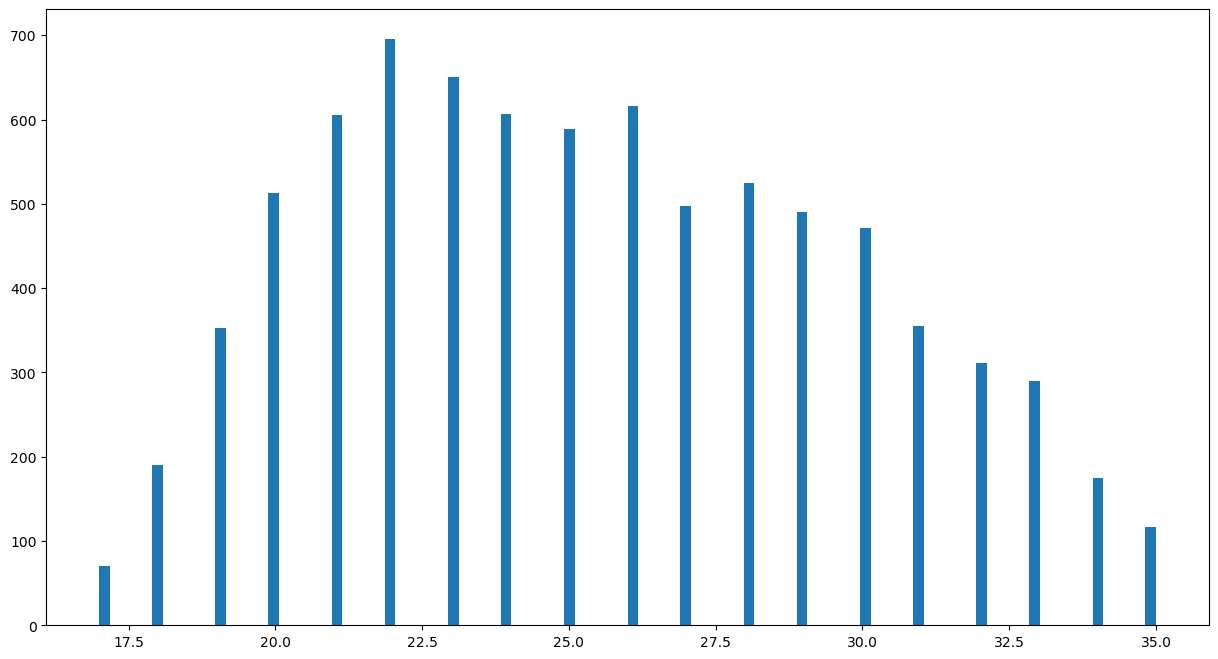

In [153]:
plt.figure(figsize=(15,8))
# plt.boxplot(df['Price']);
plt.hist(df[(df['age']<=35) & (df['age']>=17)]['age'], bins=100);


In [154]:
df = df[(df['age']<=35) & (df['age']>=17)]

In [155]:
df.shape

(8122, 18)

In [156]:
df['height'].min()

160.0

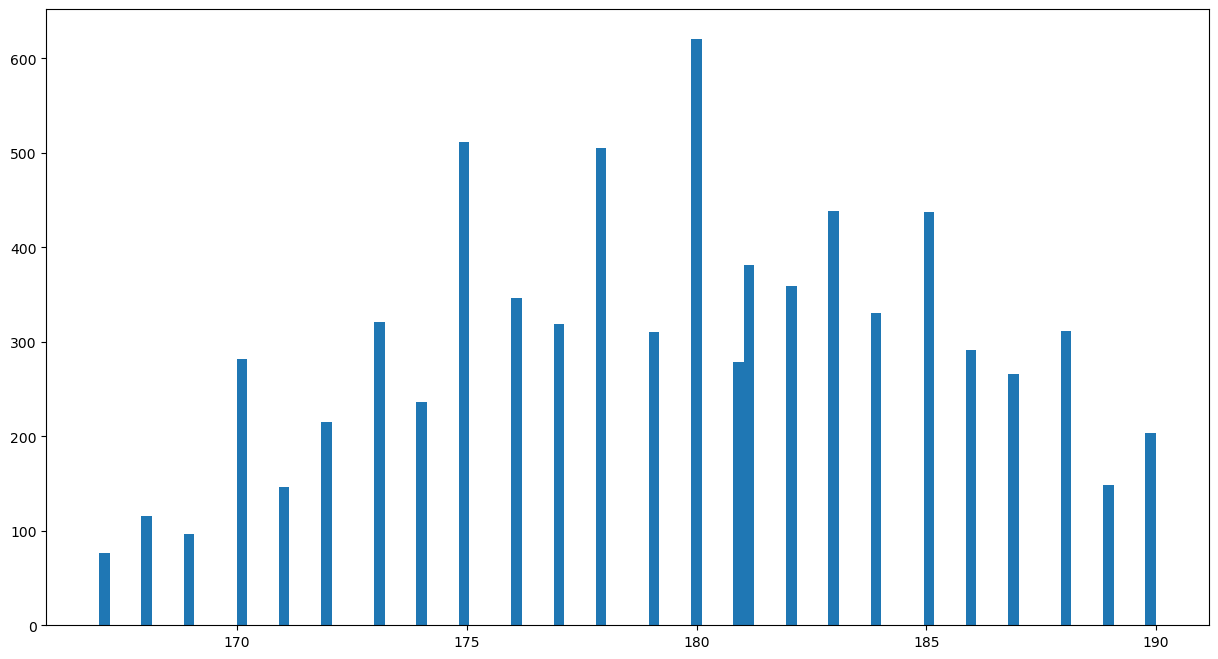

In [157]:
plt.figure(figsize=(15,8))
# plt.boxplot(df['Price']);
plt.hist(df[(df['height']<=190) & (df['height']>=167)]['height'], bins=100);

In [158]:
df = df[(df['height']<=195) & (df['height']>=165)]

In [159]:
df['goals'].unique

<bound method Series.unique of 8        0.000000
11       0.000000
20       0.129125
21       0.153759
28       0.000000
           ...   
10749    0.175953
10750    0.372671
10751    0.375000
10752    0.312139
10753    0.000000
Name: goals, Length: 8029, dtype: float64>

In [160]:
df['appearance'].min()

0

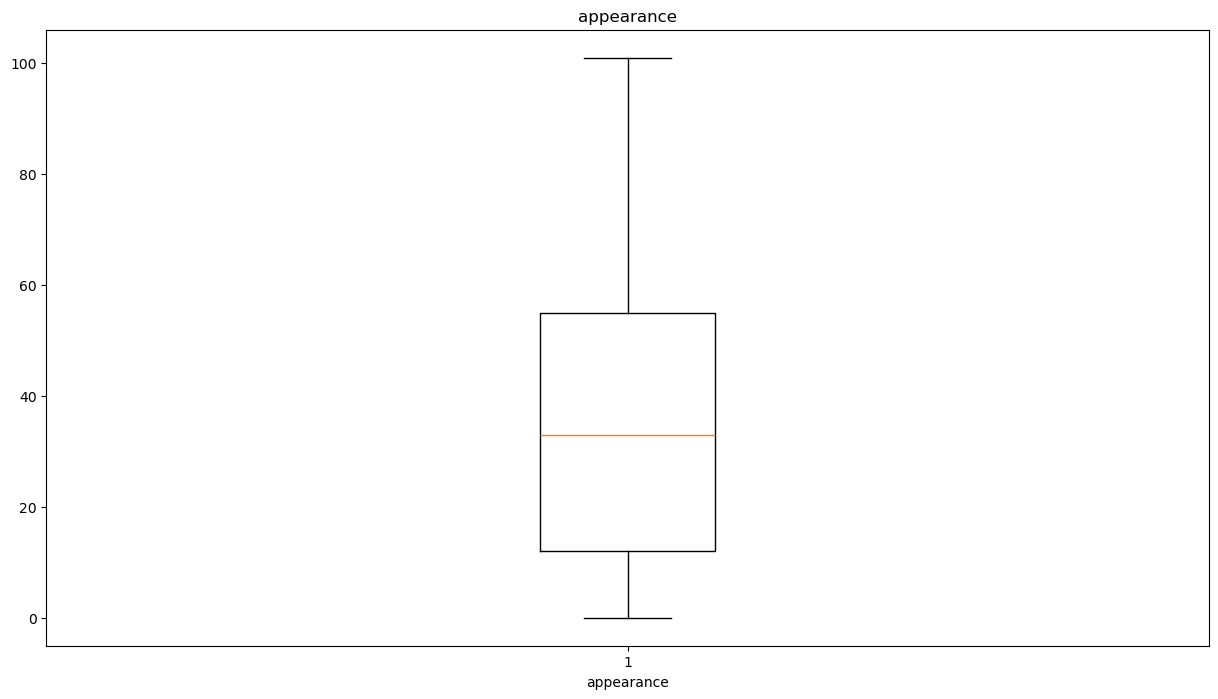

In [161]:
# Remove the outlier from Age 
plt.figure(figsize=(15,8))
plt.boxplot(df['appearance'])
plt.xlabel('appearance')
plt.title('appearance')
plt.show()

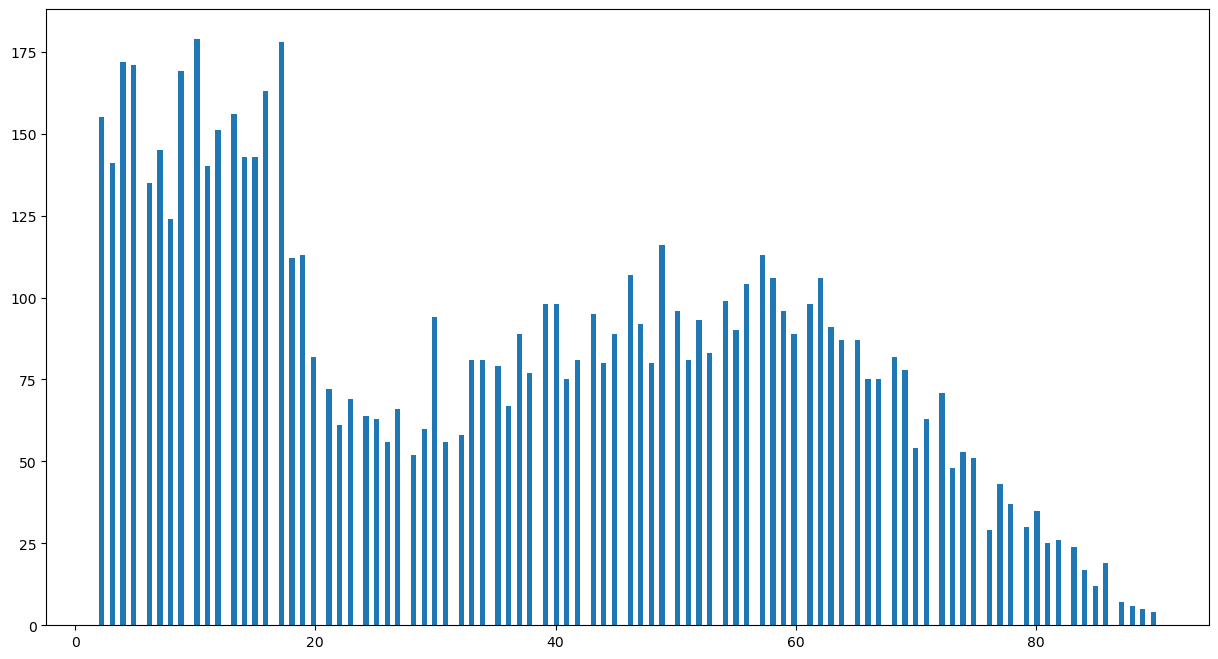

In [162]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['appearance']<=90) & (df['appearance']>1)]['appearance'], bins=200);

In [163]:
df = df[(df['appearance']<=90) & (df['appearance']>1)]

In [164]:
df['current_value']

8         2000000
11       10000000
20         800000
21         800000
28        3000000
           ...   
10749       75000
10750      300000
10751       50000
10752       50000
10753       25000
Name: current_value, Length: 7516, dtype: int64

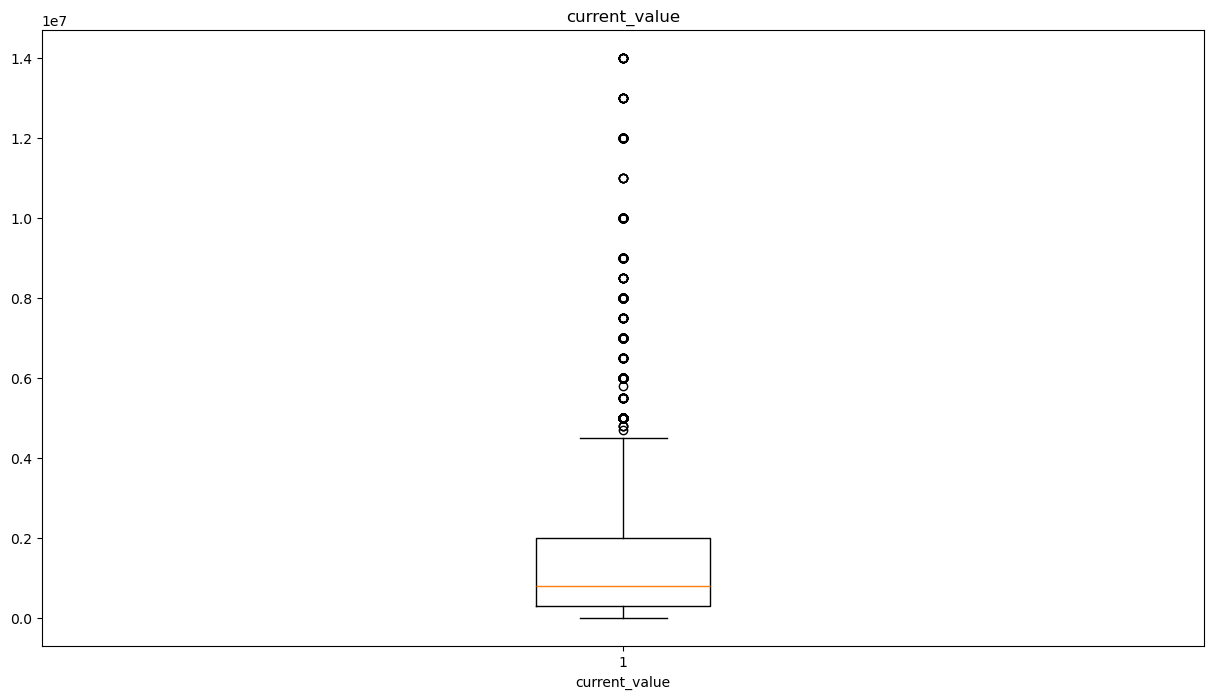

In [165]:
# Remove the outlier from Age 
plt.figure(figsize=(15,8))
plt.boxplot(df['current_value'])
plt.xlabel('current_value')
plt.title('current_value')
plt.show()

In [166]:
# remove the outlier for age

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['current_value'].quantile(0.25)
Q3 = df['current_value'].quantile(0.75)

# Calculate the IQR by subtracting Q1 from Q3
IQR = Q3 - Q1

# Define the lower and upper bounds for the outliers
speed_lower_bound = Q1 - 1.5 * IQR
speed_upper_bound = Q3 + 1.5 * IQR

# # Filter out outliers
df[(df['current_value'] < speed_lower_bound) | (df['current_value'] > speed_upper_bound)]

# Keep only rows that are not outliers
df = df[(df['current_value'] >= speed_lower_bound) & (df['current_value'] <= speed_upper_bound)]

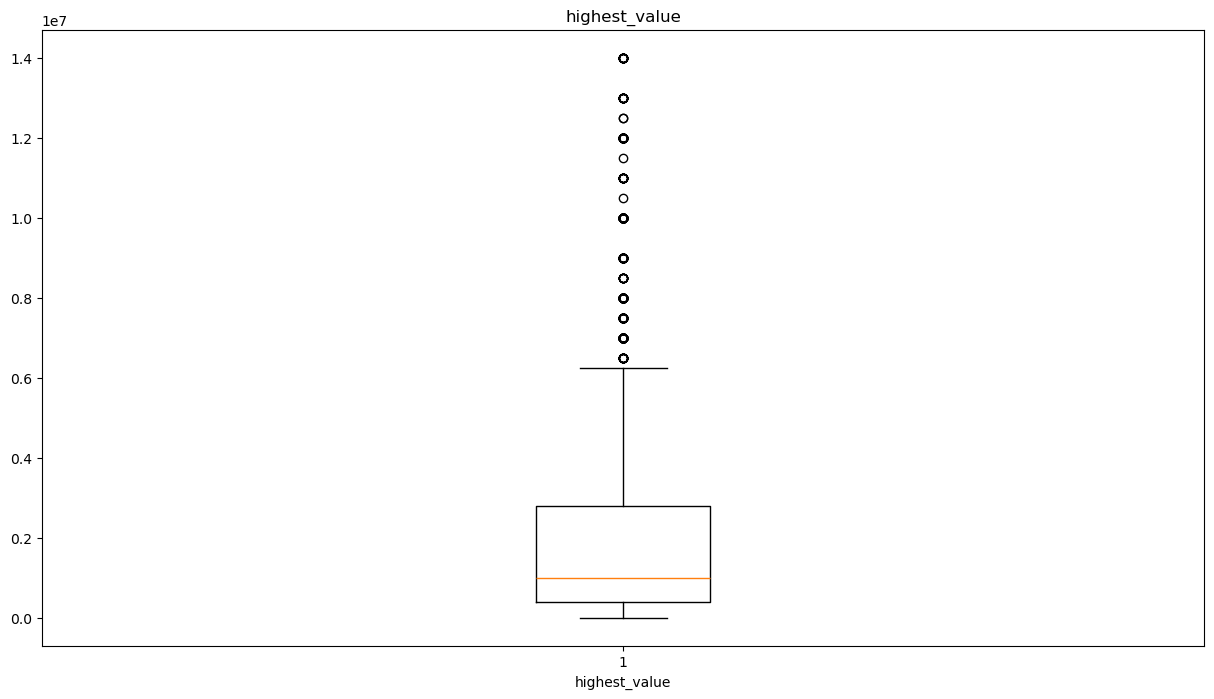

In [167]:
# Remove the outlier from Age 
plt.figure(figsize=(15,8))
plt.boxplot(df['highest_value'])
plt.xlabel('highest_value')
plt.title('highest_value')
plt.show()

In [168]:
# remove the outlier for age

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['highest_value'].quantile(0.25)
Q3 = df['highest_value'].quantile(0.75)

# Calculate the IQR by subtracting Q1 from Q3
IQR = Q3 - Q1

# Define the lower and upper bounds for the outliers
speed_lower_bound = Q1 - 1.5 * IQR
speed_upper_bound = Q3 + 1.5 * IQR

# # Filter out outliers
df[(df['highest_value'] < speed_lower_bound) | (df['highest_value'] > speed_upper_bound)]

# Keep only rows that are not outliers
df = df[(df['highest_value'] >= speed_lower_bound) & (df['highest_value'] <= speed_upper_bound)]

In [169]:
df['current_value'].max()

4500000

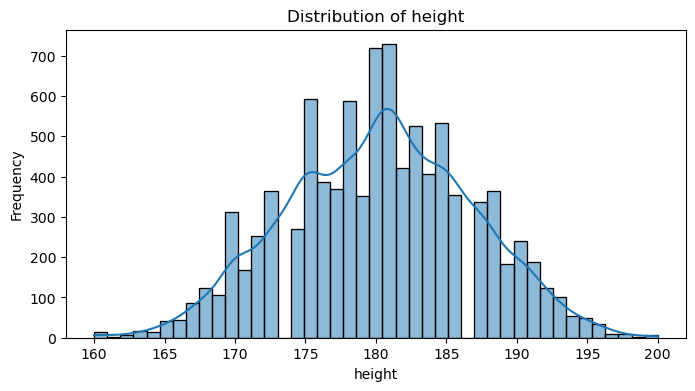

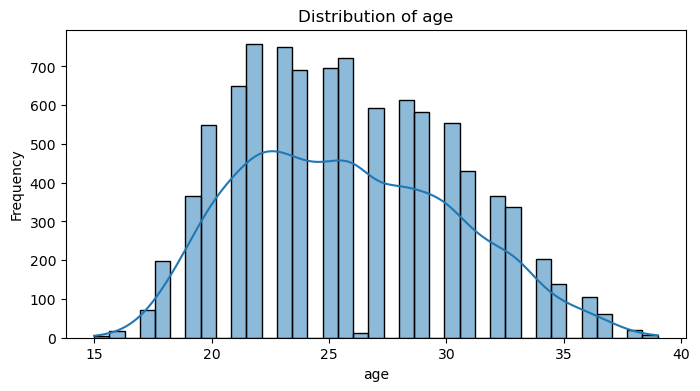

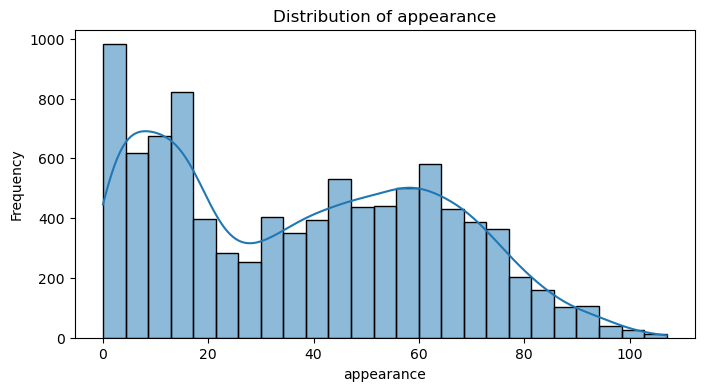

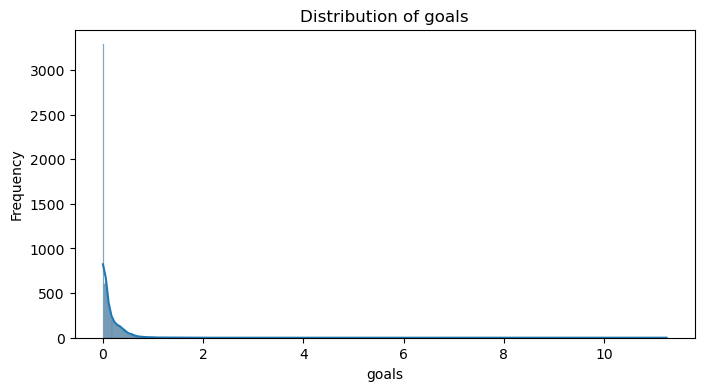

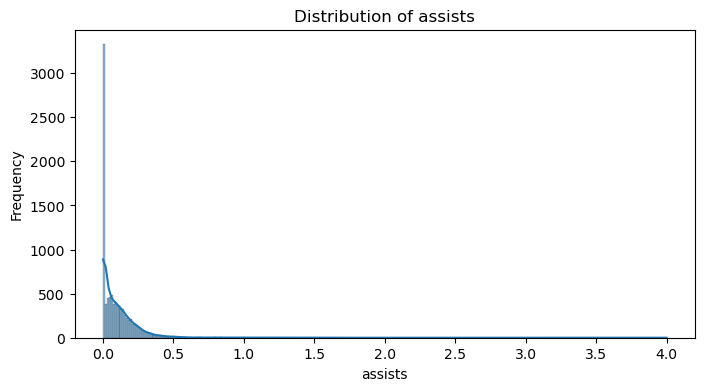

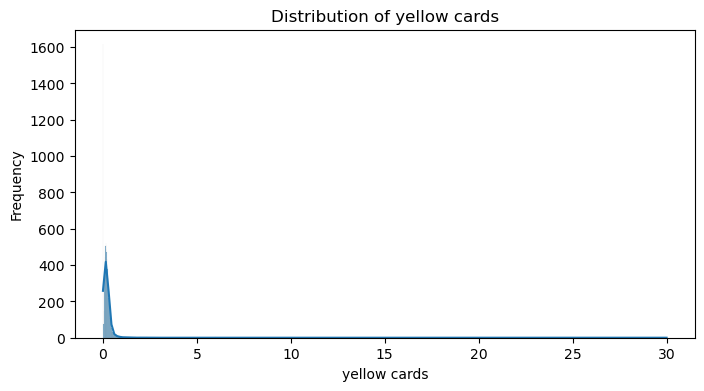

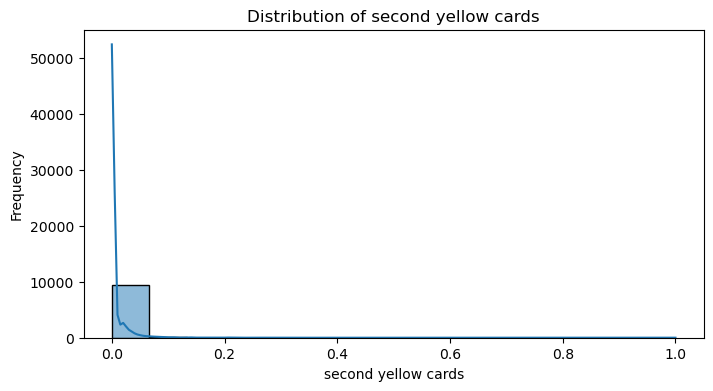

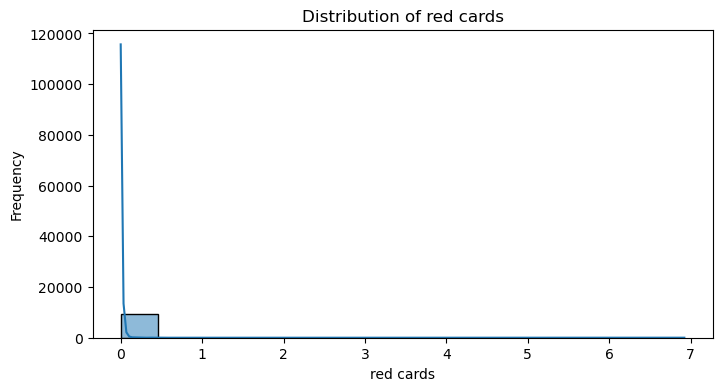

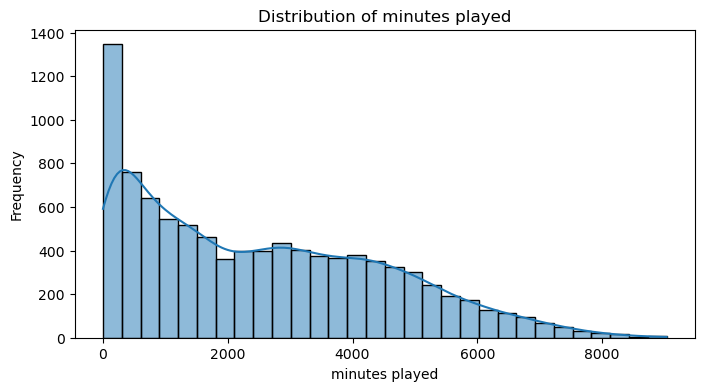

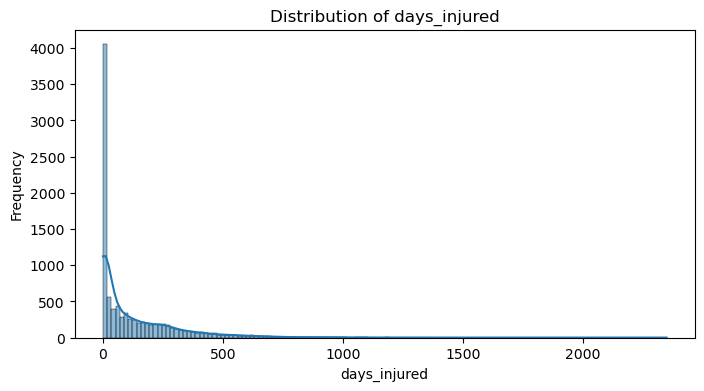

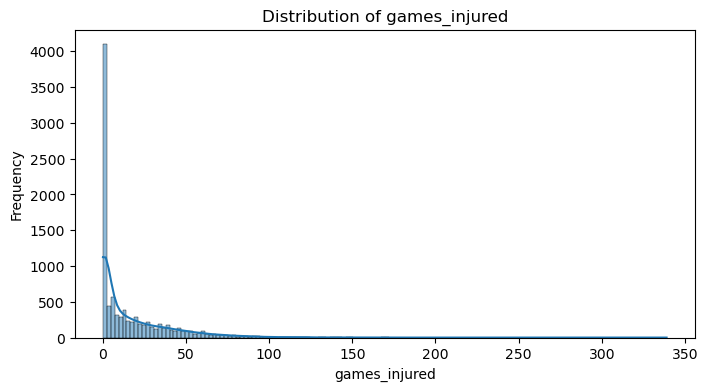

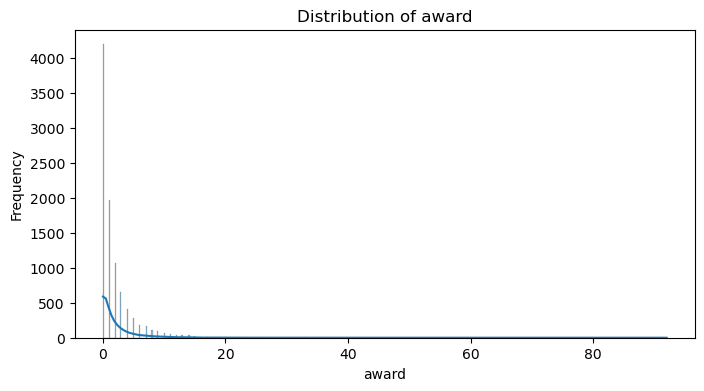

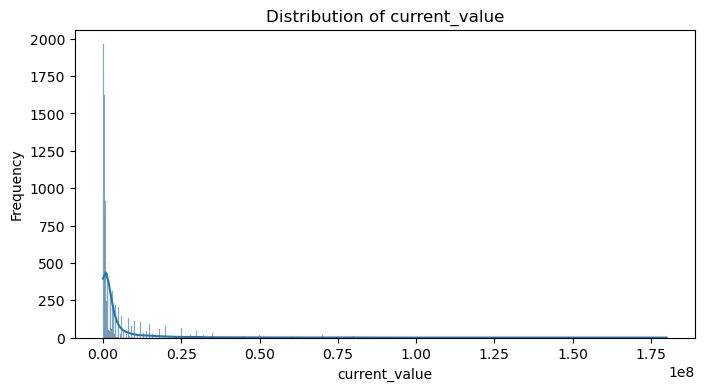

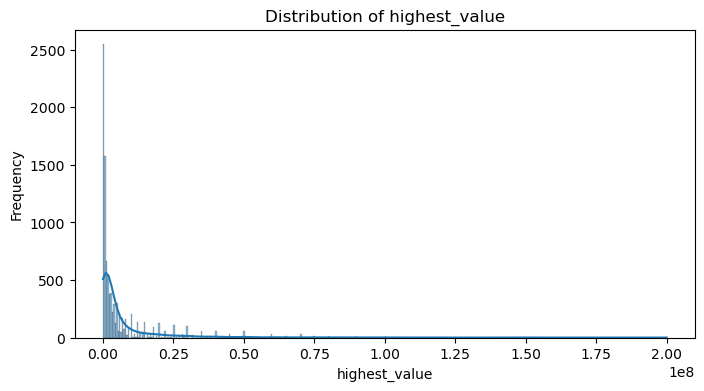

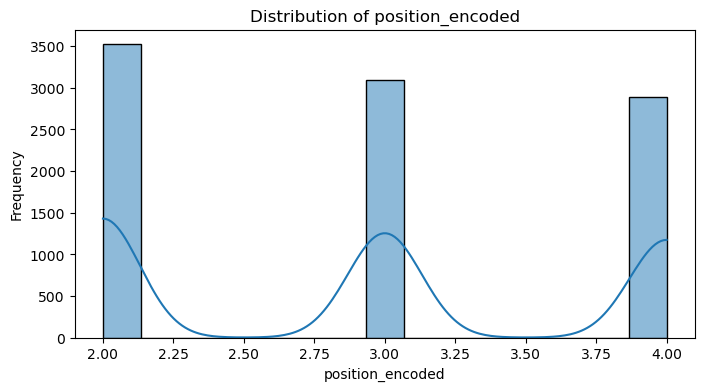

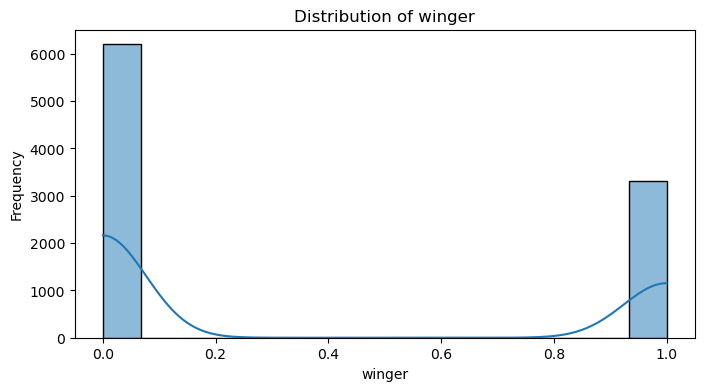

In [170]:
# Histogram for numerical features
numeric_features = df_filtered.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_filtered[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [171]:
df.shape

(6381, 18)

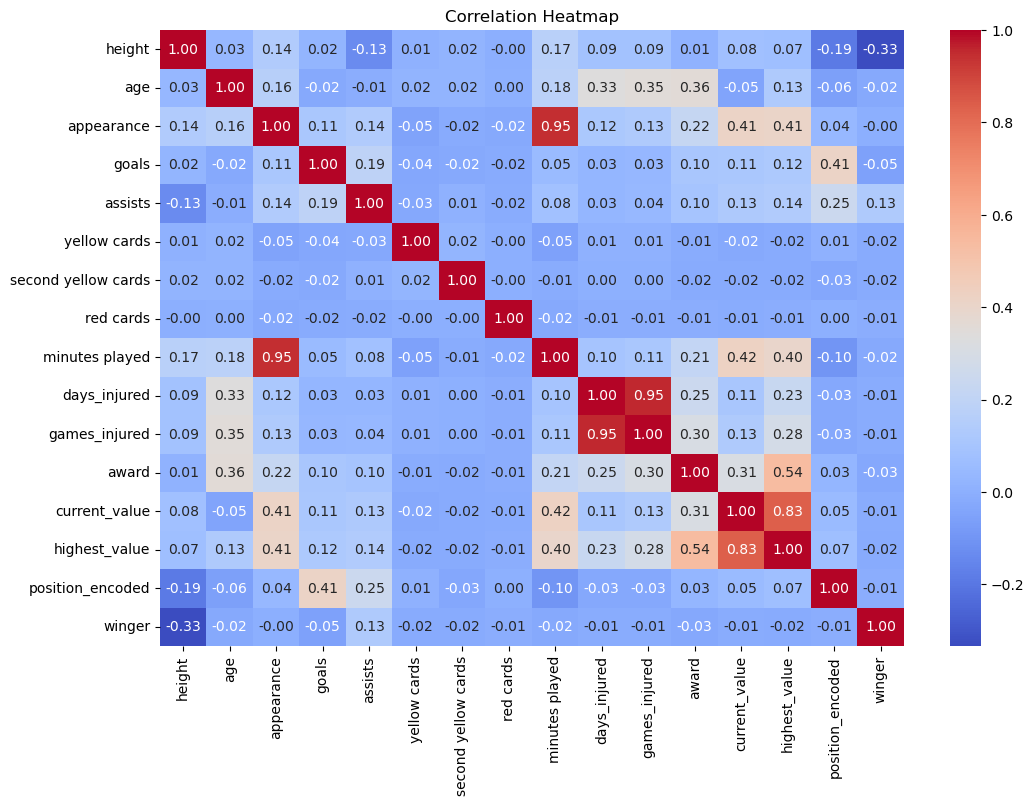

In [172]:
# Select only numerical columns
numerical_df = df_filtered.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [175]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
8,Manchester United,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,0.0,0.0,2758,47,13,0,2000000,2000000,2,0
20,Manchester United,midfield-CentralMidfield,181.0,20.0,39,0.129125,0.064562,0.225968,0.0,0.0,2788,0,0,1,800000,800000,3,0


In [176]:
categorical_features

['team', 'position']

In [177]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [178]:
df.shape

(6381, 393)

In [179]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,...,position_Defender,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
8,186.0,21.0,34,0.000000,0.000000,0.130529,0.0,0.0,2758,47,...,False,True,False,False,False,False,False,False,False,False
20,181.0,20.0,39,0.129125,0.064562,0.225968,0.0,0.0,2788,0,...,False,False,False,False,False,False,True,False,False,False


In [180]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6.381000e+03,6.381000e+03,6381.000000,6381.000000
mean,179.916945,25.526923,33.340072,0.128479,0.091985,0.210566,0.005515,0.007889,2161.747062,95.245730,12.198245,1.203103,9.958894e+05,1.509246e+06,2.912866,0.363893
std,6.280185,4.368434,22.736752,0.186263,0.141813,0.280659,0.025346,0.097765,1702.253489,162.548111,20.680614,1.976539,1.017028e+06,1.474385e+06,0.820730,0.481156
min,165.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,2.000000,0.000000
25%,175.000000,22.000000,13.000000,0.000000,0.000000,0.085960,0.000000,0.000000,681.000000,0.000000,0.000000,0.000000,3.000000e+05,4.000000e+05,2.000000,0.000000
50%,180.000000,25.000000,31.000000,0.058843,0.051843,0.175370,0.000000,0.000000,1737.000000,17.000000,2.000000,0.000000,6.000000e+05,9.500000e+05,3.000000,0.000000
75%,184.000000,29.000000,53.000000,0.182186,0.135829,0.275725,0.000000,0.000000,3393.000000,127.000000,17.000000,2.000000,1.500000e+06,2.400000e+06,4.000000,1.000000
max,195.000000,35.000000,90.000000,1.956522,2.903226,11.250000,0.559006,6.923077,7775.000000,2349.000000,339.000000,19.000000,4.500000e+06,6.250000e+06,4.000000,1.000000


In [240]:
# Calculate the 35th and 75th percentiles of current_value
p35 = df['current_value'].quantile(0.35)
p75 = df['current_value'].quantile(0.75)

# Function to categorize current_value
def categorize_value(value):
    if value < p35:
        return 'Low_Value'
    elif value < p75:
        return 'Medium_Value'
    else:
        return 'High_Value'

# Apply the function to create a new classification column
df['current_value_category'] = df['current_value'].apply(categorize_value)

# Optionally drop the original current_value column if not needed
df.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(df['current_value_category'].value_counts())


current_value_category
Medium_Value    2659
Low_Value       2098
High_Value      1624
Name: count, dtype: int64


In [110]:
p35, p75

(400000.0, 1500000.0)

In [242]:
df['current_value_category'] 

8          High_Value
20       Medium_Value
21       Medium_Value
110        High_Value
113         Low_Value
             ...     
10749       Low_Value
10750       Low_Value
10751       Low_Value
10752       Low_Value
10753       Low_Value
Name: current_value_category, Length: 6381, dtype: object

In [248]:
encoder = LabelEncoder()
df['current_value_category_encoded'] = encoder.fit_transform(df['current_value_category'])  

#### 3. Feature selection

In [130]:
# sns.heatmap(df.corr(), annot=True);

In [134]:
correlation = df.corr(numeric_only=True)
#print(correlation['Price'].sort_values(ascending=False))
print(correlation['car_price_category_encoded'].sort_values(ascending=False))

current_value                1.000000
highest_value                0.751694
minutes played               0.329433
appearance                   0.328152
award                        0.134088
                               ...   
team_Royal AM FC            -0.056345
team_Daejeon Hana Citizen   -0.057327
team_Marumo Gallants FC     -0.059919
position_Attack             -0.063758
position_midfield           -0.071901
Name: current_value, Length: 393, dtype: float64


In [140]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'minutes played', 'current_value', 'highest_value'], dtype='object')

In [143]:
df = df[selected_features]
df.head()

,appearance,minutes played,current_value,highest_value
8,34,2758,2000000,2000000
20,39,2788,800000,800000
21,51,3512,800000,800000
110,47,3507,2500000,2500000
113,46,3251,200000,200000


#### 4. Prepare train and test data

In [145]:
# Prepare data
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [151]:
X.shape

(6381, 3)

## Buliding the Model

In [153]:
model = LinearRegression()

In [155]:
ridge_model = Ridge()  # You can adjust alpha to see different resu

In [157]:
lasso_model = Lasso()  # You can adjust alpha to see different results

In [165]:
param_grid = {
    'alpha': [0, 0.003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search_ridge = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

## Train the Model

In [168]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the Model

In [171]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

In [173]:
# Fit GridSearchCV on the training data
grid_search_ridge.fit(X_train_scaled, y_train)
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the best parameters and best model

# Ridge
best_params_ridge = grid_search_ridge.best_params_
best_model_ridge = grid_search_ridge.best_estimator_

# Lasso
best_params_lasso = grid_search_lasso.best_params_
best_model_lasso = grid_search_lasso.best_estimator_

print("Best Parameters for ridge model:", best_params_ridge)
print("Best Parameters for lasso model:", best_params_lasso)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for ridge model: {'alpha': 1}
Best Parameters for lasso model: {'alpha': 0}


In [175]:
# Predict and evaluate the model

y_pred = model.predict(X_test_scaled)                  # Linear regression model
y_pred_ridge = best_model_ridge.predict(X_test_scaled) # Ridge model
y_pred_lasso = best_model_lasso.predict(X_test_scaled) # Lasso model

## Interpretation of the Model

In [184]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])                  # Linear model cofficients
coeff_df_ridge = pd.DataFrame(best_model_ridge.coef_,X.columns,columns=['Coefficient']) # Ridge model cofficients
coeff_df_lasso = pd.DataFrame(best_model_lasso.coef_,X.columns,columns=['Coefficient']) # Lasso model cofficients
print(coeff_df)
print(coeff_df_ridge)
print(coeff_df_lasso)

                  Coefficient
appearance      -51681.100653
minutes played  180917.132602
highest_value   726452.439208
                  Coefficient
appearance      -51264.397937
minutes played  180533.182760
highest_value   726294.974959
                  Coefficient
appearance      -51681.100653
minutes played  180917.132602
highest_value   726452.439208


In [186]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [192]:
print(f" Ridge model intercept: {best_model_ridge.intercept_}") 

 Ridge model intercept: 997956.5047021944


In [194]:
print(f" Linear regression intercept: {model.intercept_}") 

 Linear regression intercept: 997956.5047021944


In [196]:
print(f" Lasso model intercept: {best_model_lasso.intercept_}") 

 Lasso model intercept: 997956.5047021944


In [75]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso model
lasso_model = Lasso()

# Train the Lasso model
lasso_model.fit(X_train, y_train)

# Now you can access the coefficients
coeff_df = pd.DataFrame(lasso_model.coef_, X.columns, columns=['Coefficient'])

# Display the coefficients
print(coeff_df)


                  Coefficient
appearance       -3341.682077
assists         277170.040779
minutes played      61.696497
highest_value        0.718352


## Evaluating the Model 

1. Mean Square Error

In [229]:
y_base = [y_train.mean()] * len(y_test)

In [231]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 1.031209e+12


In [233]:
# MSE for Linear model
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:2e}')
print(f'Mean Squared Error for testing: {mse_test:2e}')


Mean Squared Error for training: 4.388908e+11
Mean Squared Error for testing: 4.147318e+11


In [235]:
# MSE for Ridge model
mse_train_ridge = mean_squared_error(y_train, best_model_ridge.predict(X_train_scaled))
mse_test_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error for training ridge model: {mse_train_ridge:2e}')
print(f'Mean Squared Error for testing ridge model: {mse_test_ridge:2e}')


Mean Squared Error for training ridge model: 4.388908e+11
Mean Squared Error for testing ridge model: 4.147388e+11


In [237]:
# MSE Lasso model
mse_train_lasso = mean_squared_error(y_train, best_model_lasso.predict(X_train_scaled))
mse_test_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error for training lasso model: {mse_train_lasso:2e}')
print(f'Mean Squared Error for testing lasso model: {mse_test_lasso:2e}')

Mean Squared Error for training lasso model: 4.388908e+11
Mean Squared Error for testing lasso model: 4.147318e+11


2. Mean Absolute Error

In [239]:
# our benchmark model
mae_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mae_base:2e}')

Mean Absolute  Error of base model: 7.846715e+05


In [241]:
# Linear model
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')

Mean Absolute Error for training: 4.315575e+05
Mean Absolute Error for testing: 4.182693e+05


In [243]:
# MSE for Ridge model
mae_train_ridge = mean_absolute_error(y_train, best_model_ridge.predict(X_train_scaled))
mae_test_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'Mean Absolute Error for training ridge model: {mae_train_ridge:2e}')
print(f'Mean Absolute Error for testing ridge model: {mae_test_ridge:2e}')

Mean Absolute Error for training ridge model: 4.315847e+05
Mean Absolute Error for testing ridge model: 4.182991e+05


In [245]:
# Lasso model
mae_train_lasso = mean_absolute_error(y_train, best_model_lasso.predict(X_train_scaled))
mae_test_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'Mean Absolute Error for training lasso model: {mae_train_lasso:2e}')
print(f'Mean Absolute Error for testing lasso model: {mae_test_lasso:2e}')

Mean Absolute Error for training lasso model: 4.315575e+05
Mean Absolute Error for testing lasso model: 4.182693e+05


3. Root Mean Squared Error

In [247]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base):2e}')

Root Mean Squared  Error of base model: 1.015485e+06


In [249]:
# RMSE for Linear model

print(f'Root Mean Squared Error for training: {np.sqrt(mse_train):2e}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test):2e}')

Root Mean Squared Error for training: 6.624883e+05
Root Mean Squared Error for testing: 6.439968e+05


In [251]:
# RMSE for Ridge model

print(f'Root Mean Squared Error for training ridge model: {np.sqrt(mse_train_ridge):2e}')
print(f'Root Mean Squared Error for testing ridge model: {np.sqrt(mse_test_ridge):2e}')


Root Mean Squared Error for training ridge model: 6.624883e+05
Root Mean Squared Error for testing ridge model: 6.440022e+05


In [253]:
# RMSE Lasso model

print(f'Root Mean Squared Error for training lasso model: {np.sqrt(mse_train_lasso):2e}')
print(f'Root Mean Squared Error for testing lasso model: {np.sqrt(mse_test_lasso):2e}')

Root Mean Squared Error for training lasso model: 6.624883e+05
Root Mean Squared Error for testing lasso model: 6.439968e+05


4. R Square

In [255]:
# Linear model r2 score
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.5759237792546941
R Square for testing: 0.5977783684476736


In [257]:
# Ridge model r2 score
r2_score_train_ridge = r2_score(y_train, best_model_ridge.predict(X_train_scaled))
r2_score_test_ridge = r2_score(y_test, y_pred_ridge)
print(f'R Square for training ridge model: {r2_score_train_ridge}')
print(f'R Square for testing ridge model: {r2_score_test_ridge}')

R Square for training ridge model: 0.575923740437675
R Square for testing ridge model: 0.5977716162206325


In [259]:
# Lasso model r2 score
r2_score_train_lasso = r2_score(y_train, best_model_lasso.predict(X_train_scaled))
r2_score_test_lasso = r2_score(y_test, y_pred_lasso)
print(f'R Square for training lasso model: {r2_score_train_lasso}')
print(f'R Square for testing lasso model: {r2_score_test_lasso}')

R Square for training lasso model: 0.5759237792546941
R Square for testing lasso model: 0.5977783684476736


#### Predictions vs. Real Values

In [261]:
predictions = model.predict(X_test_scaled)
#predictions

In [263]:
Real_Values = np.array(y_test)
# Real_Values

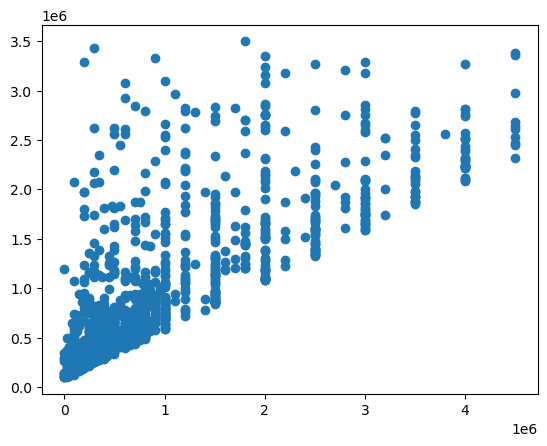

In [265]:
plt.scatter(Real_Values,predictions); 

#### Residual Histogram

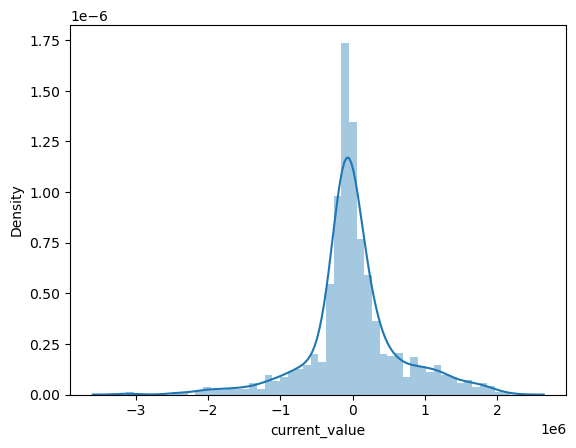

In [268]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution